In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

C:\Users\mainf\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
input_dir = 'archive (18)/Data'
categories = ['glioma_tumor','meningioma_tumor','normal','pituitary_tumor']

data = []
labels = []

for category_idx,category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path = os.path.join(input_dir,category,file)
        img = imread(img_path)
        img = resize(img,(15,15))
        data.append(img.flatten())
        labels.append(category_idx)
        

In [3]:
number_classes = {
    'glioma_tumor': len(os.listdir('archive (18)/Data/glioma_tumor')),
    'meningioma_tumor': len(os.listdir('archive (18)/Data/meningioma_tumor')),
    'normal': len(os.listdir('archive (18)/Data/normal')),
    'pituitary_tumor': len(os.listdir('archive (18)/Data/pituitary_tumor'))
}

In [4]:
number_classes

{'glioma_tumor': 901,
 'meningioma_tumor': 913,
 'normal': 438,
 'pituitary_tumor': 844}

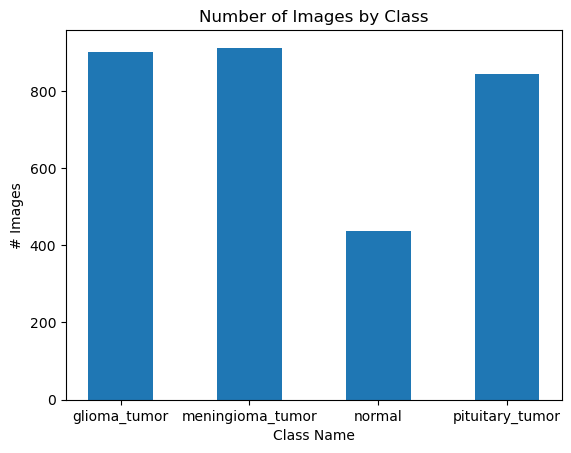

In [5]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [6]:
from PIL import Image
import dask.bag as bag
from dask import diagnostics


In [7]:
directories = {
    'glioma_tumor': 'archive (18)/Data/glioma_tumor',
    'meningioma_tumor': 'archive (18)/Data/meningioma_tumor',
    'normal': 'archive (18)/Data/normal',
    'pituitary_tumor': 'archive (18)/Data/pituitary_tumor'
}

def get_dims(file):

    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

In [8]:
get_dims('archive (18)/Data/glioma_tumor/G_1.jpg')

(256, 256)

901
[########################################] | 100% Completed | 1.73 ss
913
[########################################] | 100% Completed | 1.73 ss
438
[########################################] | 100% Completed | 1.63 ss
844
[########################################] | 100% Completed | 1.94 ss


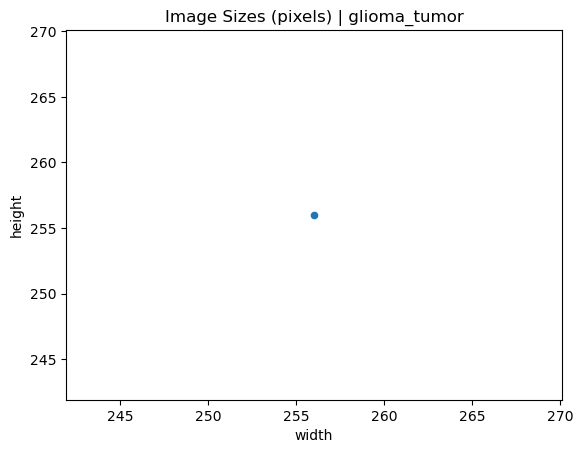

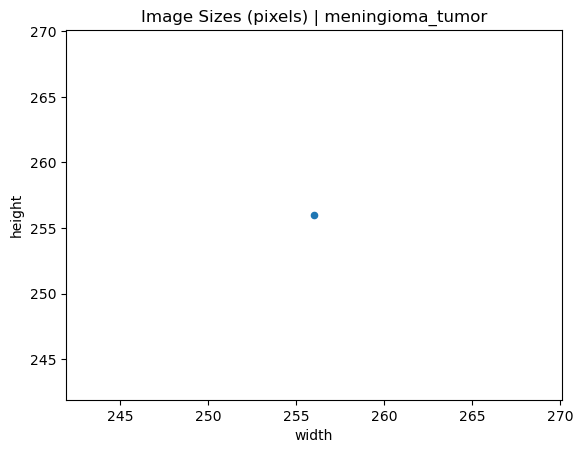

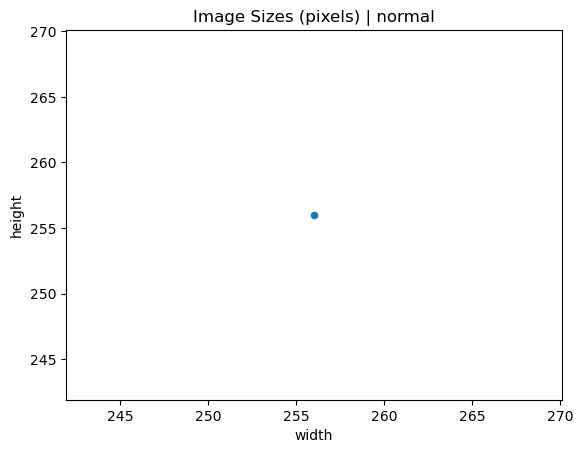

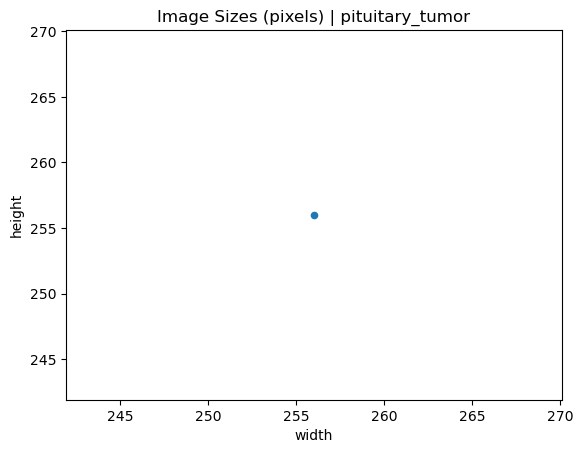

In [9]:
for n,d in directories.items():
    filepath = d
    filelist = [os.path.join(filepath, f) for f in os.listdir(filepath)]
    print(len(filelist))
    dims = bag.from_sequence(filelist).map(get_dims)
    with diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

In [10]:
data = np.asarray(data)
labels = np.asarray(labels)

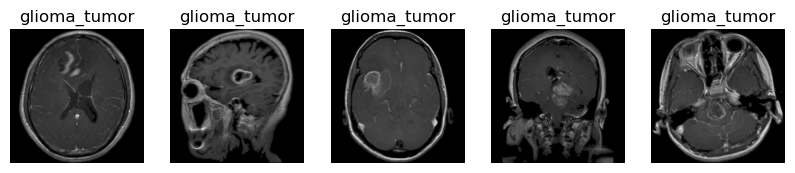

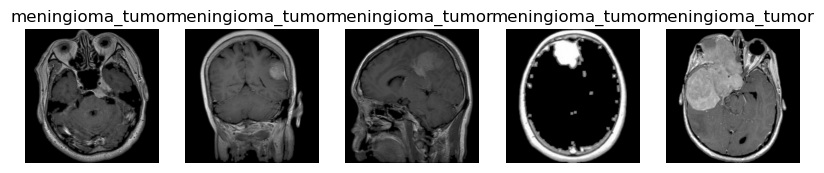

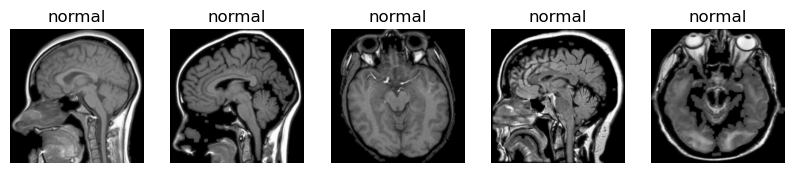

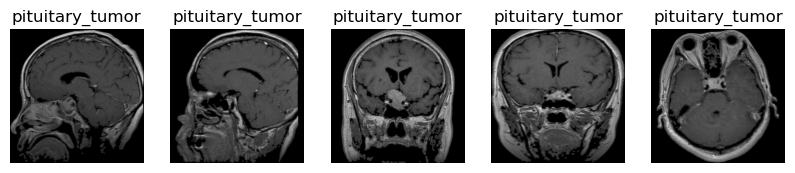

In [11]:
import random
from PIL import Image
for i in directories.values():
    image_files = os.listdir(i) 
    sampled_images = random.sample(image_files, 5)


    plt.figure(figsize=(10, 10)) 
    for j, image_file in enumerate(sampled_images):
        img = Image.open(os.path.join(i, image_file))
        plt.subplot(1, 5, j + 1)
        plt.imshow(img)
        plt.axis('off')
        parts = i.split('/')
        plt.title(parts[-1])
plt.show()


In [12]:
data

array([[1.29676122e-12, 1.29676122e-12, 1.29676122e-12, ...,
        1.74988130e-05, 1.74988130e-05, 1.74988130e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.33767273e-12, 1.33767273e-12, 1.33767273e-12],
       [4.22922865e-14, 4.22922865e-14, 4.22922865e-14, ...,
        4.41609308e-09, 4.41609308e-09, 4.41609308e-09],
       ...,
       [3.82682482e-09, 3.82682482e-09, 3.82682482e-09, ...,
        4.71911205e-05, 4.71911205e-05, 4.71911205e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.41258522e-03, 1.41258522e-03, 1.41258522e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.61911932e-04, 1.61911932e-04, 1.61911932e-04]])

In [13]:
len(data)

3096

In [14]:
len(labels) 

3096

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=.2,stratify=labels,shuffle=True)

In [16]:
classifier = SVC()

parameters = [{'gamma': [0.01,0.001,0.0001],'C':[1,10,100,1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_

In [35]:
y_preds_svc = best_model.predict(X_test)
print(classification_report(y_test,y_preds_svc))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       180
           1       0.83      0.79      0.81       183
           2       0.90      0.82      0.86        88
           3       0.91      0.95      0.93       169

    accuracy                           0.86       620
   macro avg       0.86      0.85      0.86       620
weighted avg       0.86      0.86      0.86       620



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Keras is simplier to use 
#Pytorch is more "Pythonic"
#Tenosr flow is the most complex to learn



In [37]:
print(X_train.shape)


(2476, 675)


In [38]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
model = Sequential()
model.add(Dense(600, input_shape=(675,), activation='relu'))  
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.fit(X_train,y_train,epochs=100)
y_preds = model.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)

print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 1s 4ms/step - loss: 1.2731 - accuracy: 0.4055
Epoch 2/100
78/78 [==============================] - 0s 5ms/step - loss: 1.0648 - accuracy: 0.5388
Epoch 3/100
78/78 [==============================] - 0s 4ms/step - loss: 0.9913 - accuracy: 0.5561
Epoch 4/100
78/78 [==============================] - 0s 4ms/step - loss: 0.9243 - accuracy: 0.5981
Epoch 5/100
78/78 [==============================] - 0s 4ms/step - loss: 0.8379 - accuracy: 0.6563
Epoch 6/100
78/78 [==============================] - 0s 4ms/step - loss: 0.8210 - accuracy: 0.6640
Epoch 7/100
78/78 [==============================] - 0s 4ms/step - loss: 0.8015 - accuracy: 0.6672
Epoch 8/100
78/78 [==============================] - 0s 4ms/step - loss: 0.7723 - accuracy: 0.6854
Epoch 9/100
78/78 [==============================] - 0s 4ms/step - loss: 0.7277 - accuracy: 0.6935
Epoch 10/100
78/78 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.7124
Epoch 11/

78/78 [==============================] - 0s 4ms/step - loss: 0.0669 - accuracy: 0.9782
Epoch 84/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9762
Epoch 85/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9774
Epoch 86/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0672 - accuracy: 0.9746
Epoch 87/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9709
Epoch 88/100
78/78 [==============================] - 0s 4ms/step - loss: 0.1262 - accuracy: 0.9523
Epoch 89/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0923 - accuracy: 0.9669
Epoch 90/100
78/78 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9810
Epoch 91/100
78/78 [==============================] - 0s 4ms/step - loss: 0.1094 - accuracy: 0.9637
Epoch 92/100
78/78 [==============================] - 0s 4ms/step - loss: 0.1429 - accuracy: 0.9523
Epoch 93/100


In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop])


y_preds = model.predict(X_test)
class_predictions = np.argmax(y_preds, axis=1)
print(classification_report(y_test,class_predictions))

Epoch 1/100
78/78 [==============================] - 1s 7ms/step - loss: 0.2036 - accuracy: 0.9382 - val_loss: 0.9472 - val_accuracy: 0.8016
Epoch 2/100
78/78 [==============================] - 1s 7ms/step - loss: 0.1242 - accuracy: 0.9592 - val_loss: 0.7352 - val_accuracy: 0.8710
Epoch 3/100
78/78 [==============================] - 1s 7ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.8387 - val_accuracy: 0.8726
Epoch 4/100
78/78 [==============================] - 1s 7ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.8202 - val_accuracy: 0.8839
Epoch 5/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.9175 - val_accuracy: 0.8919
Epoch 6/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.9438 - val_accuracy: 0.8774
Epoch 7/100
78/78 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9984 - val_loss: 0.9582 - val_accuracy: 0.8952
Epoch 8/100
7

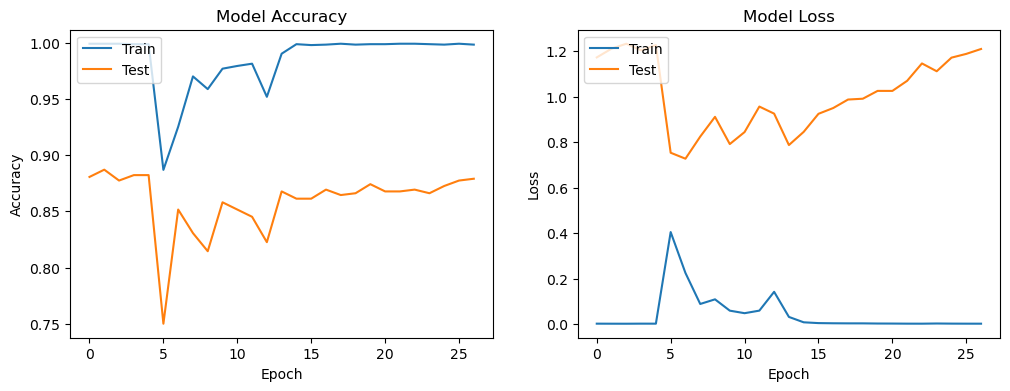

In [48]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
